## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [280]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [281]:
x = np.linspace(0,20)
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [282]:
a=-1
b=2
y=a*x+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

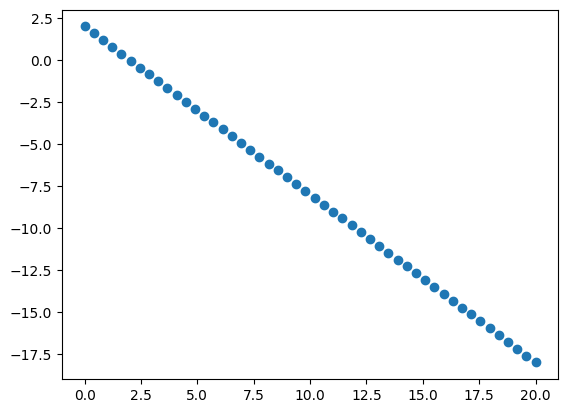

In [283]:
plt.scatter(x,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [284]:
def GD(data,target,learning_rate,max_iterations,batch_size=1):
    data=data.reshape(-1,1)
    target=target.reshape(-1,1)
    x_0 = np.ones(data.shape)
    arr= np.concatenate([x_0,data,target],axis=1)
    np.random.shuffle(arr)
    x_0=arr[:,0]
    x_1=arr[:,1]
    target=arr[:,2]
    theta_0 = 0
    theta_1 = 0
    theta_0_list=[]
    theta_1_list=[]
    loss=[]
    itterations_per_batch = len(x_0)//batch_size
    print(itterations_per_batch)
    if len(data)%batch_size != 0:
        itterations_per_batch+=1
    for k in range(max_iterations):
        print("************************* iter",k,"*************************")
        for i in range(itterations_per_batch):
            x_0_batch=x_0[i*batch_size:(i+1)*batch_size]
            x_1_batch=x_1[i*batch_size:(i+1)*batch_size]
            y_batch=target[i*batch_size:(i+1)*batch_size]
            if i == itterations_per_batch-1:
                x_0_batch=x_0[i*batch_size:]
                x_1_batch=x_1[i*batch_size:]
                y_batch=target[i*batch_size:]
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
            y_hat = theta_0*x_0_batch+theta_1*x_1_batch
            e = (y_hat-y_batch)
            j = (np.linalg.norm(e)**2)/(2*batch_size)
            loss.append(j)
            Gradiant_vec = np.array([[np.sum(e)/batch_size],[np.sum(e*x_1_batch)/batch_size]])
            theta_0 = theta_0 - (learning_rate*Gradiant_vec[0,0])
            theta_1 = theta_1 - (learning_rate*Gradiant_vec[1,0])
            Gradiant_vec_norm = np.linalg.norm(Gradiant_vec)
            if Gradiant_vec_norm < 0.001:
                return theta_0_list,theta_1_list,loss,theta_0,theta_1
            if len(loss)>=2:
                if abs(loss[-1]-loss[-2])<0.001:
                    return theta_0_list,theta_1_list,loss,theta_0,theta_1
        print('j =',j)
        print(Gradiant_vec)
        print("Gradiant_vec_norm =",Gradiant_vec_norm)
        print("theta_new :")
        print(theta_0)
        print(theta_1)
    return theta_0_list,theta_1_list,loss,theta_0,theta_1
def r2_s(theta_0,theta_1,x,y):
    print(theta_0)
    print(theta_1)
    x_0 = np.ones(x.shape)
    y_hat = theta_0*x_0+theta_1*x
    print(y_hat)
    print(r2_score(y,y_hat))
def plot_loss_epocs(loss_list):
    xaxis=np.linspace(0,len(loss_list),len(loss_list))
    plt.plot(xaxis,loss_list,marker="o")
    plt.show()
def plot_theta_loss(loss_list,theta_0_list,theta_1_list):
    plt.plot(theta_0_list,loss_list,marker="o")
    plt.grid(True)
    plt.xlabel("theta_0")
    plt.ylabel("loss")
    plt.show()
    plt.clf()
    plt.plot(theta_1_list,loss_list,marker="o")
    plt.grid(True)
    plt.xlabel("theta_1")
    plt.ylabel("loss")
    plt.show()
def plot_regression_lines(theta_0_list,theta_1_list,x,y):
    plt.scatter(x,y,s=12)
    for i in range(len(theta_0_list)):
        x0=np.ones(x.shape)
        y_hat=theta_0_list[i]*x0+theta_1_list[i]*x
        plt.plot(x,y_hat,'red')
    plt.grid(True)
    plt.show()
def plot_best_regression_line(theta_0,theta_1,x,y):
    plt.scatter(x,y,s=12)
    x0=np.ones(x.shape)
    y_hat=theta_0*x0+theta_1*x
    plt.plot(x,y_hat,'red')
    plt.show()

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [285]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1 =GD(x,y,0.0005,300,len(x))

1
************************* iter 0 *************************
j = 49.346938775510196
[[  8.        ]
 [114.69387755]]
Gradiant_vec_norm = 114.97254258164628
theta_new :
-0.004
-0.05734693877551021
************************* iter 1 *************************
j = 42.96137982976481
[[  7.42253061]
 [106.929596  ]]
Gradiant_vec_norm = 107.1869043389593
theta_new :
-0.007711265306122449
-0.1108117367763432
************************* iter 2 *************************
j = 37.41136489517328
[[ 6.88417137]
 [99.69110239]]
Gradiant_vec_norm = 99.92851300714295
theta_new :
-0.011153350989587672
-0.16065728797303847
************************* iter 3 *************************
j = 32.58756147787421
[[ 6.38227377]
 [92.94279097]]
Gradiant_vec_norm = 93.16166492307666
theta_new :
-0.014344487874227686
-0.20712868345664098
************************* iter 4 *************************
j = 28.394943445570494
[[ 5.91436868]
 [86.65146715]]
Gradiant_vec_norm = 86.8530742997376
theta_new :
-0.01730167221300737
-0.25

In [286]:
r2_s(theta_0,theta_1,x,y)

-0.04498751489901113
-0.8395654934952042
[ -0.04498751  -0.38766731  -0.7303471   -1.07302689  -1.41570669
  -1.75838648  -2.10106627  -2.44374607  -2.78642586  -3.12910565
  -3.47178545  -3.81446524  -4.15714503  -4.49982483  -4.84250462
  -5.18518441  -5.52786421  -5.870544    -6.21322379  -6.55590359
  -6.89858338  -7.24126317  -7.58394297  -7.92662276  -8.26930255
  -8.61198235  -8.95466214  -9.29734193  -9.64002173  -9.98270152
 -10.32538131 -10.66806111 -11.0107409  -11.35342069 -11.69610049
 -12.03878028 -12.38146007 -12.72413987 -13.06681966 -13.40949945
 -13.75217925 -14.09485904 -14.43753883 -14.78021863 -15.12289842
 -15.46557821 -15.80825801 -16.1509378  -16.49361759 -16.83629738]
0.9686642263802531


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

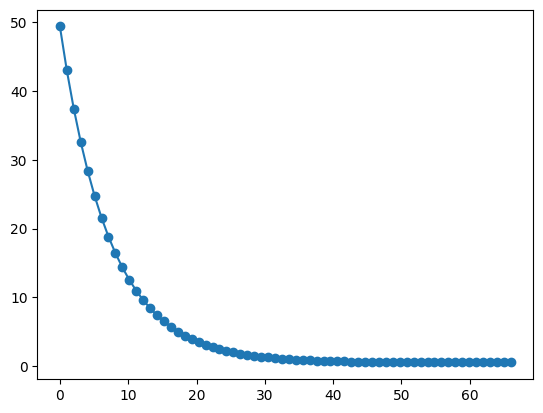

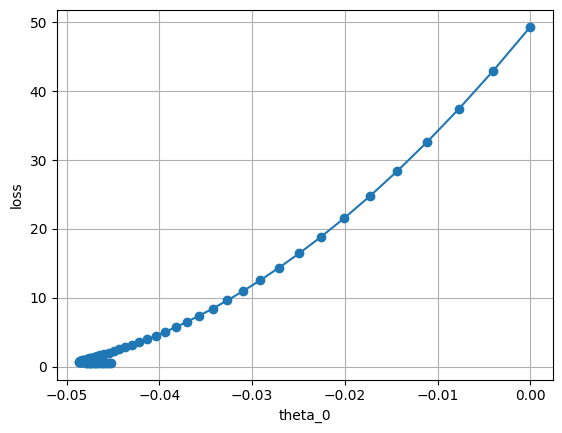

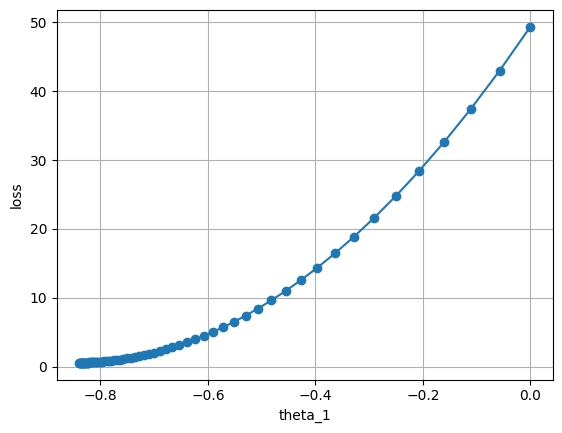

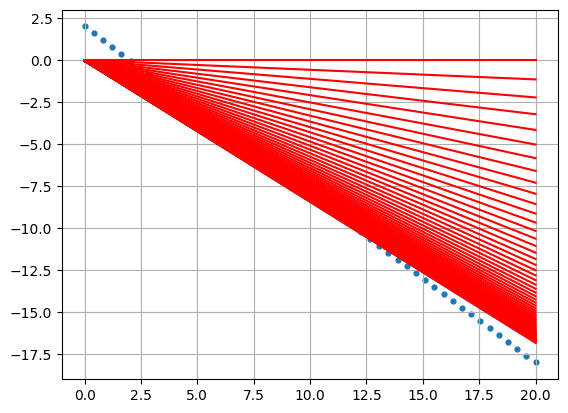

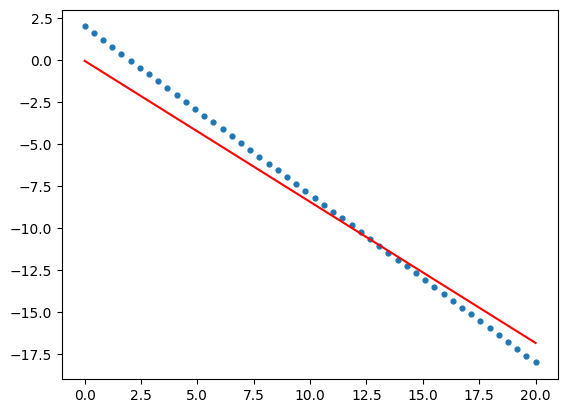

In [287]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,x,y)
plot_best_regression_line(theta_0,theta_1,x,y)

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [288]:
def GD(data,target,learning_rate,max_iterations,gamma,batch_size=1):
    data=data.reshape(-1,1)
    target=target.reshape(-1,1)
    x_0 = np.ones(data.shape)
    arr= np.concatenate([x_0,data,target],axis=1)
    np.random.shuffle(arr)
    x_0=arr[:,0]
    x_1=arr[:,1]
    target=arr[:,2]
    theta_0 = 0
    theta_1 = 0
    v_theta_0 = 0
    v_theta_1 = 0
    theta_0_list=[]
    theta_1_list=[]
    loss=[]
    itterations_per_batch = len(x_0)//batch_size
    print(itterations_per_batch)
    if len(data)%batch_size != 0:
        itterations_per_batch+=1
    for k in range(max_iterations):
        print("************************* iter",k,"*************************")
        for i in range(itterations_per_batch):
            x_0_batch=x_0[i*batch_size:(i+1)*batch_size]
            x_1_batch=x_1[i*batch_size:(i+1)*batch_size]
            y_batch=target[i*batch_size:(i+1)*batch_size]
            if i == itterations_per_batch-1:
                x_0_batch=x_0[i*batch_size:]
                x_1_batch=x_1[i*batch_size:]
                y_batch=target[i*batch_size:]
            y_hat = theta_0*x_0_batch+theta_1*x_1_batch
            e = (y_hat-y_batch)
            j = (np.linalg.norm(e)**2)/(2*batch_size)
            loss.append(j)
            Gradiant_vec = np.array([[np.sum(e)/batch_size],[np.sum(e*x_1_batch)/batch_size]])
            v_theta_0 = gamma*v_theta_0 + learning_rate*Gradiant_vec[0,0]
            v_theta_1 = gamma*v_theta_1 + learning_rate*Gradiant_vec[1,0]
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
            theta_0 = theta_0 - v_theta_0
            theta_1 = theta_1 - v_theta_1
            Gradiant_vec_norm = np.linalg.norm(Gradiant_vec)
            if Gradiant_vec_norm < 0.001:
                return theta_0_list,theta_1_list,loss,theta_0,theta_1
            if len(loss)>=2:
                if abs(loss[-1]-loss[-2])<0.001:
                    return theta_0_list,theta_1_list,loss,theta_0,theta_1
        print('j =',j)
        print(Gradiant_vec)
        print("Gradiant_vec_norm =",Gradiant_vec_norm)
        print("theta_new :")
        print(theta_0)
        print(theta_1)
    return theta_0_list,theta_1_list,loss,theta_0,theta_1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [289]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1 = GD(x,y,0.0005,300,0.5,len(x))

1
************************* iter 0 *************************
j = 49.346938775510196
[[  8.        ]
 [114.69387755]]
Gradiant_vec_norm = 114.97254258164628
theta_new :
-0.004
-0.05734693877551022
************************* iter 1 *************************
j = 42.96137982976481
[[  7.42253061]
 [106.929596  ]]
Gradiant_vec_norm = 107.18690433895928
theta_new :
-0.00971126530612245
-0.13948520616409832
************************* iter 2 *************************
j = 34.59505273675567
[[ 6.59543667]
 [95.80896162]]
Gradiant_vec_norm = 96.03570643965882
theta_new :
-0.01586461629571012
-0.22845882066774903
************************* iter 3 *************************
j = 26.568631719629952
[[ 5.69954718]
 [83.76322697]]
Gradiant_vec_norm = 83.95691175071546
theta_new :
-0.021791065379017358
-0.3148272414053699
************************* iter 4 *************************
j = 19.80786692190886
[[ 4.82993652]
 [72.07066499]]
Gradiant_vec_norm = 72.23232683099452
theta_new :
-0.027169258180954618
-0.3

In [290]:
r2_s(theta_0,theta_1,x,y)

-0.04689233682058176
-0.8439759549926683
[ -0.04689234  -0.39137232  -0.7358523   -1.08033228  -1.42481226
  -1.76929224  -2.11377223  -2.45825221  -2.80273219  -3.14721217
  -3.49169215  -3.83617213  -4.18065212  -4.5251321   -4.86961208
  -5.21409206  -5.55857204  -5.90305202  -6.24753201  -6.59201199
  -6.93649197  -7.28097195  -7.62545193  -7.96993191  -8.3144119
  -8.65889188  -9.00337186  -9.34785184  -9.69233182 -10.0368118
 -10.38129179 -10.72577177 -11.07025175 -11.41473173 -11.75921171
 -12.10369169 -12.44817168 -12.79265166 -13.13713164 -13.48161162
 -13.8260916  -14.17057158 -14.51505157 -14.85953155 -15.20401153
 -15.54849151 -15.89297149 -16.23745147 -16.58193146 -16.92641144]
0.9688302192119861


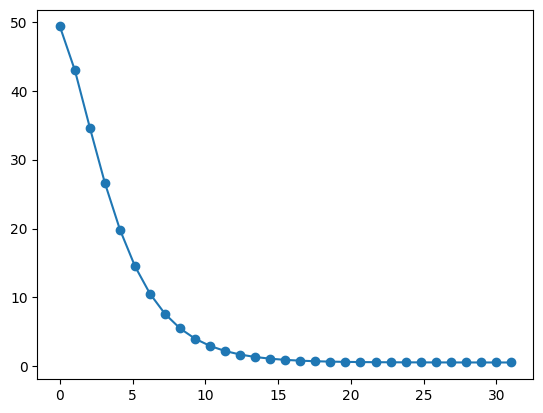

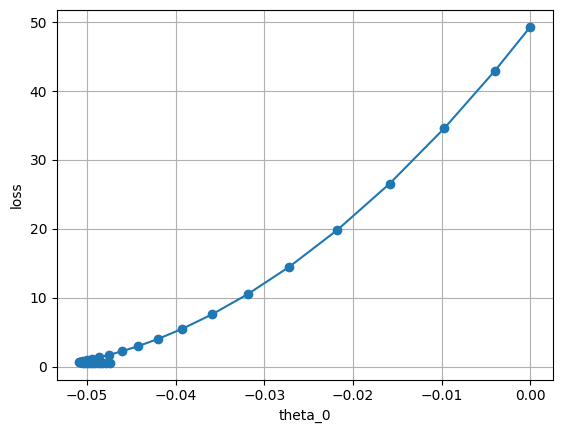

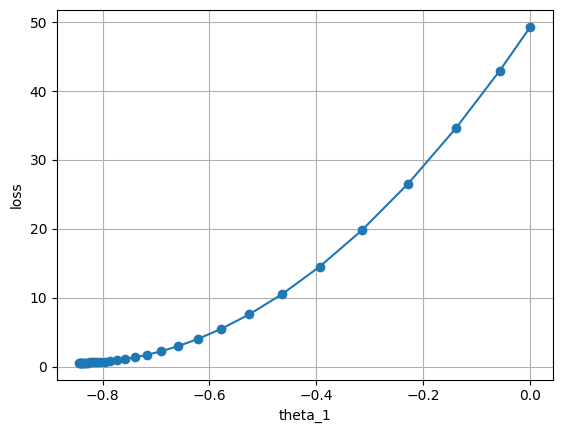

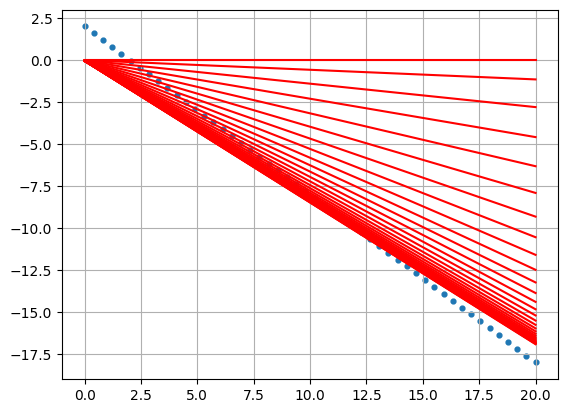

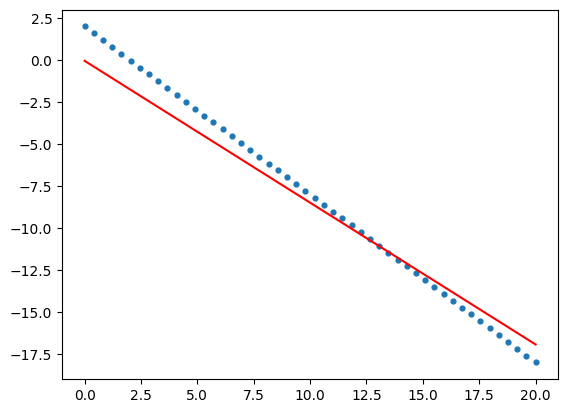

In [291]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,x,y)
plot_best_regression_line(theta_0,theta_1,x,y)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [292]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1 = GD(x,y,0.0005,300,0.9,len(x))

1
************************* iter 0 *************************
j = 49.34693877551022
[[  8.        ]
 [114.69387755]]
Gradiant_vec_norm = 114.97254258164628
theta_new :
-0.004
-0.05734693877551021
************************* iter 1 *************************
j = 42.96137982976481
[[  7.42253061]
 [106.929596  ]]
Gradiant_vec_norm = 107.18690433895928
theta_new :
-0.011311265306122451
-0.1624239816743024
************************* iter 2 *************************
j = 32.422565188137185
[[ 6.36444892]
 [92.703249  ]]
Gradiant_vec_norm = 92.92146460853121
theta_new :
-0.021073628540608083
-0.30334494478270113
************************* iter 3 *************************
j = 20.647830716719696
[[ 4.94547692]
 [73.62443442]]
Gradiant_vec_norm = 73.7903454746908
theta_new :
-0.03233249391346134
-0.46698602878892603
************************* iter 4 *************************
j = 10.366099070733151
[[ 3.29780722]
 [51.47039363]]
Gradiant_vec_norm = 51.57593385579325
theta_new :
-0.04411437635812791
-0.6

In [293]:
r2_s(theta_0,theta_1,x,y)

0.11758914199174537
-0.8663401402585069
[  0.11758914  -0.23601908  -0.5896273   -0.94323552  -1.29684374
  -1.65045196  -2.00406018  -2.3576684   -2.71127662  -3.06488484
  -3.41849306  -3.77210128  -4.1257095   -4.47931772  -4.83292595
  -5.18653417  -5.54014239  -5.89375061  -6.24735883  -6.60096705
  -6.95457527  -7.30818349  -7.66179171  -8.01539993  -8.36900815
  -8.72261637  -9.07622459  -9.42983281  -9.78344103 -10.13704925
 -10.49065747 -10.84426569 -11.19787391 -11.55148213 -11.90509036
 -12.25869858 -12.6123068  -12.96591502 -13.31952324 -13.67313146
 -14.02673968 -14.3803479  -14.73395612 -15.08756434 -15.44117256
 -15.79478078 -16.148389   -16.50199722 -16.85560544 -17.20921366]
0.9735481947368928


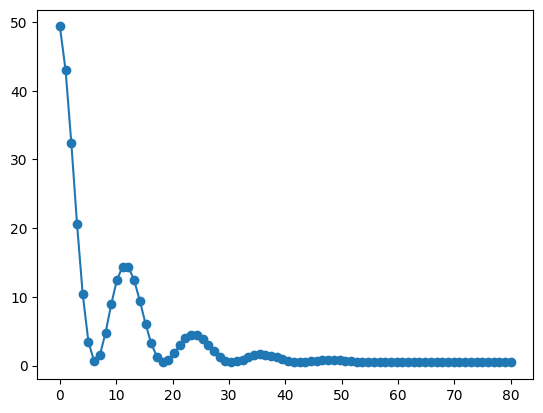

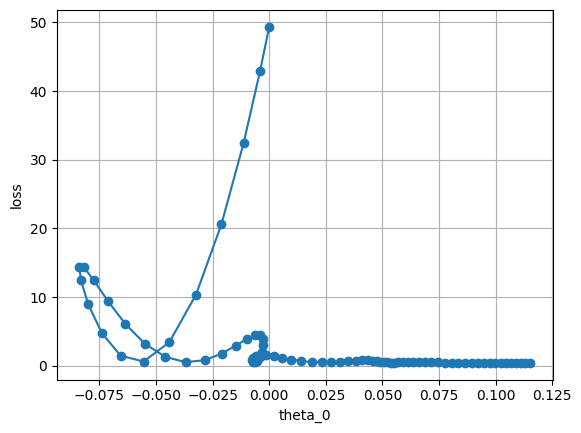

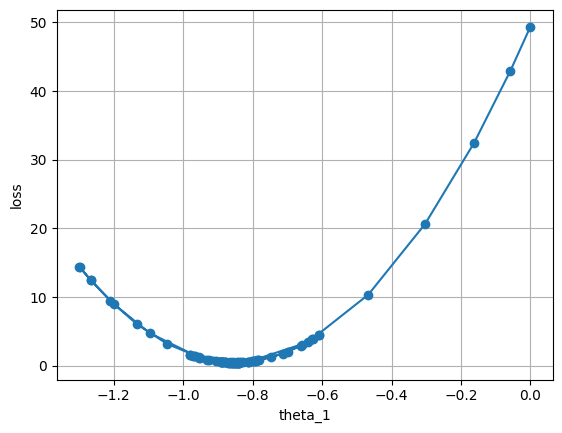

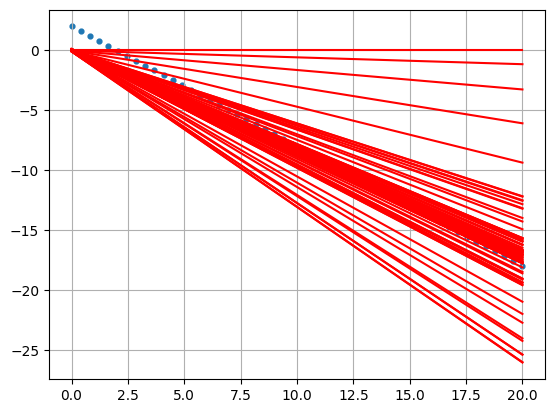

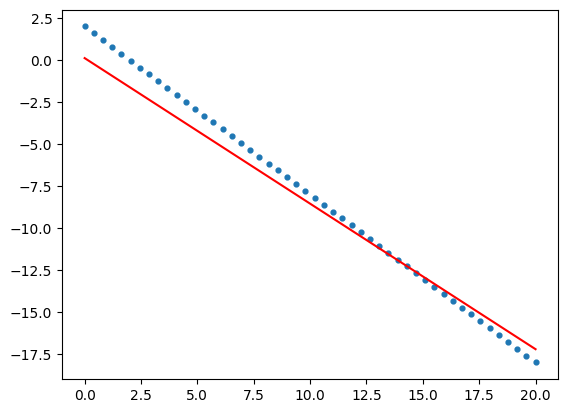

In [294]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,x,y)
plot_best_regression_line(theta_0,theta_1,x,y)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [295]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1 = GD(x,y,0.0005,300,0.89,len(x))

1
************************* iter 0 *************************
j = 49.346938775510196
[[  8.        ]
 [114.69387755]]
Gradiant_vec_norm = 114.97254258164628
theta_new :
-0.004
-0.05734693877551021
************************* iter 1 *************************
j = 42.96137982976481
[[  7.42253061]
 [106.929596  ]]
Gradiant_vec_norm = 107.18690433895928
theta_new :
-0.01127126530612245
-0.1618505122865473
************************* iter 2 *************************
j = 32.47600461992306
[[ 6.37022361]
 [92.78089181]]
Gradiant_vec_norm = 92.9993206144656
theta_new :
-0.020927803234485634
-0.3012491386186028
************************* iter 3 *************************
j = 20.803153317662442
[[ 4.96658081]
 [73.90818493]]
Gradiant_vec_norm = 74.07487242298458
theta_new :
-0.03200541239601861
-0.4622680085187478
************************* iter 4 *************************
j = 10.611530691937753
[[ 3.3453145 ]
 [52.10915289]]
Gradiant_vec_norm = 52.21642408504826
theta_new :
-0.04353714180099121
-0.6316

In [296]:
r2_s(theta_0,theta_1,x,y)

0.07765319657938802
-0.8496687413136573
[  0.0776532   -0.26915037  -0.61595394  -0.96275751  -1.30956107
  -1.65636464  -2.00316821  -2.34997178  -2.69677535  -3.04357891
  -3.39038248  -3.73718605  -4.08398962  -4.43079319  -4.77759675
  -5.12440032  -5.47120389  -5.81800746  -6.16481103  -6.51161459
  -6.85841816  -7.20522173  -7.5520253   -7.89882886  -8.24563243
  -8.592436    -8.93923957  -9.28604314  -9.6328467   -9.97965027
 -10.32645384 -10.67325741 -11.02006098 -11.36686454 -11.71366811
 -12.06047168 -12.40727525 -12.75407882 -13.10088238 -13.44768595
 -13.79448952 -14.14129309 -14.48809665 -14.83490022 -15.18170379
 -15.52850736 -15.87531093 -16.22211449 -16.56891806 -16.91572163]
0.9723393985102275


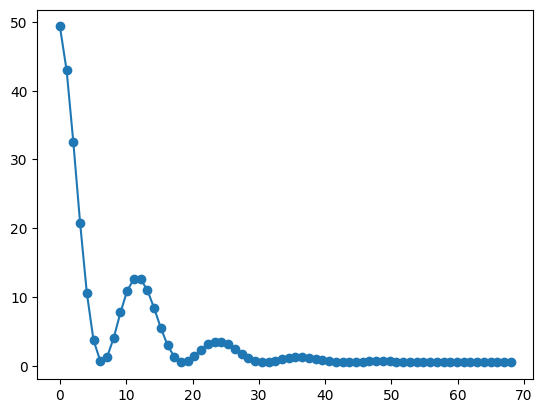

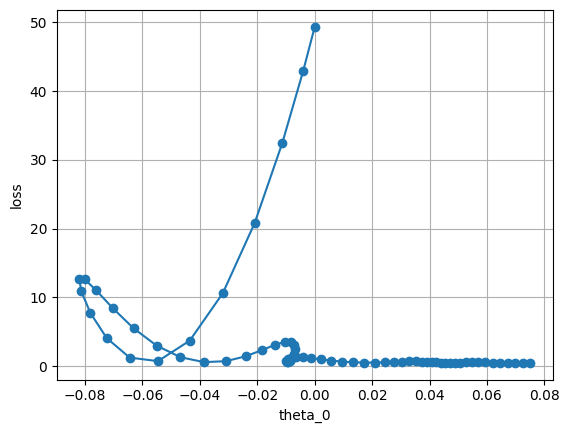

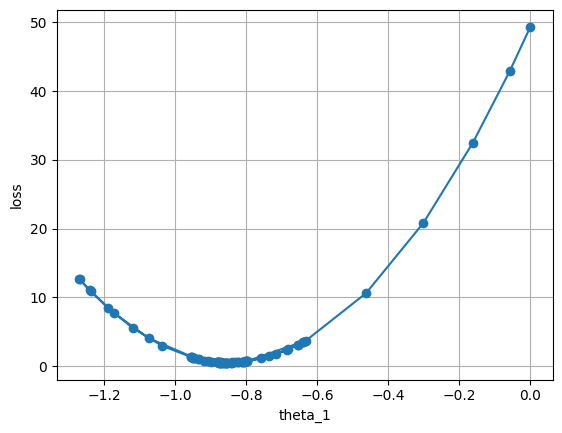

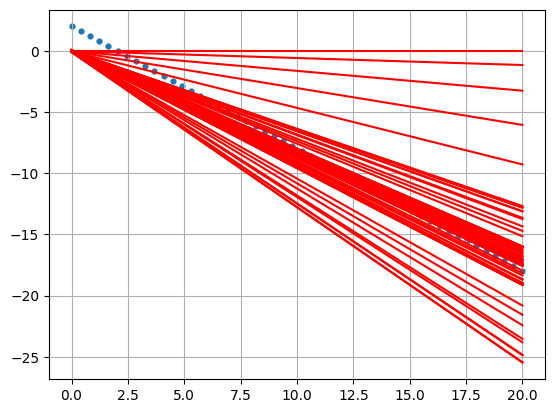

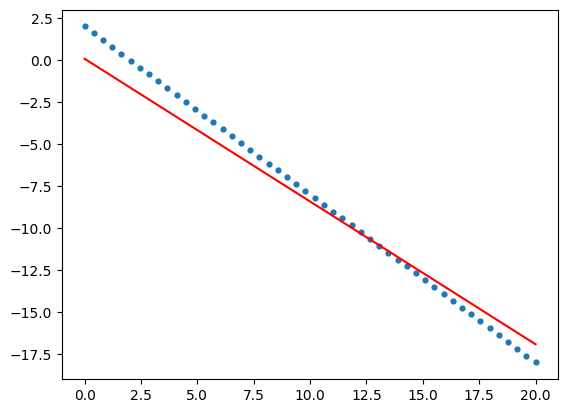

In [297]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,x,y)
plot_best_regression_line(theta_0,theta_1,x,y)

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [298]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1 = GD(x,y,0.0005,300,0.01,len(x))

1
************************* iter 0 *************************
j = 49.346938775510196
[[  8.        ]
 [114.69387755]]
Gradiant_vec_norm = 114.97254258164628
theta_new :
-0.004
-0.05734693877551021
************************* iter 1 *************************
j = 42.96137982976481
[[  7.42253061]
 [106.929596  ]]
Gradiant_vec_norm = 107.18690433895928
theta_new :
-0.007751265306122449
-0.11138520616409829
************************* iter 2 *************************
j = 37.353942111247235
[[ 6.87839667]
 [99.61345958]]
Gradiant_vec_norm = 99.85065683243741
theta_new :
-0.01122797629571012
-0.16173231862693266
************************* iter 3 *************************
j = 32.48724748666632
[[ 6.37144884]
 [92.79724467]]
Gradiant_vec_norm = 93.01571898369488
theta_new :
-0.014448467824323479
-0.20863441208500333
************************* iter 4 *************************
j = 28.264009136340945
[[ 5.89920741]
 [86.44761492]]
Gradiant_vec_norm = 86.64866284700544
theta_new :
-0.017430276445272435
-

In [299]:
r2_s(theta_0,theta_1,x,y)

-0.0450679204409293
-0.8393942788652029
[ -0.04506792  -0.38767783  -0.73028774  -1.07289765  -1.41550756
  -1.75811747  -2.10072738  -2.44333729  -2.7859472   -3.12855711
  -3.47116702  -3.81377693  -4.15638684  -4.49899675  -4.84160666
  -5.18421657  -5.52682648  -5.86943639  -6.2120463   -6.55465621
  -6.89726612  -7.23987602  -7.58248593  -7.92509584  -8.26770575
  -8.61031566  -8.95292557  -9.29553548  -9.63814539  -9.9807553
 -10.32336521 -10.66597512 -11.00858503 -11.35119494 -11.69380485
 -12.03641476 -12.37902467 -12.72163458 -13.06424449 -13.4068544
 -13.74946431 -14.09207422 -14.43468413 -14.77729404 -15.11990395
 -15.46251386 -15.80512377 -16.14773368 -16.49034359 -16.8329535 ]
0.968650631908056


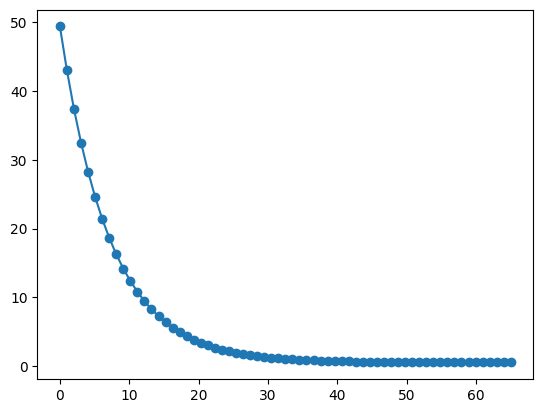

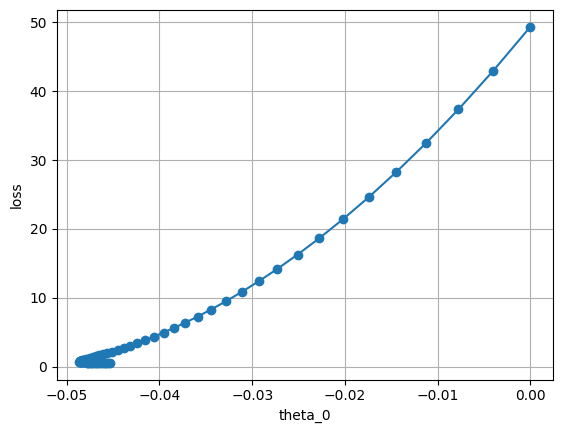

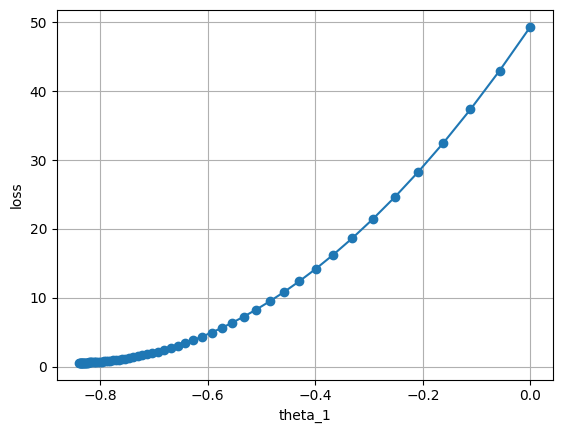

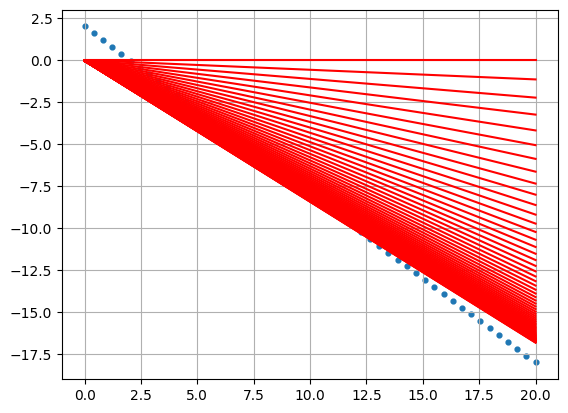

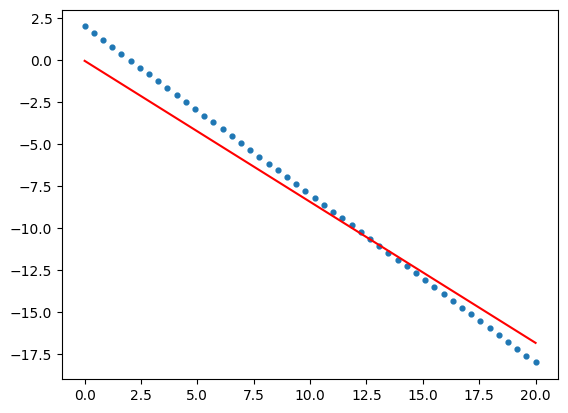

In [300]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,x,y)
plot_best_regression_line(theta_0,theta_1,x,y)

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [301]:
def GD(data,target,learning_rate,max_iterations,gamma,batch_size=1):
    data=data.reshape(-1,1)
    target=target.reshape(-1,1)
    x_0 = np.ones(data.shape)
    arr= np.concatenate([x_0,data,target],axis=1)
    np.random.shuffle(arr)
    x_0=arr[:,0]
    x_1=arr[:,1]
    target=arr[:,2]
    theta_0 = 0
    theta_1 = 0
    v_theta_0 = 0
    v_theta_1 = 0
    theta_0_list=[]
    theta_1_list=[]
    loss=[]
    itterations_per_batch = len(x_0)//batch_size
    print(itterations_per_batch)
    if len(data)%batch_size != 0:
        itterations_per_batch+=1
    for k in range(max_iterations):
        print("************************* iter",k,"*************************")
        for i in range(itterations_per_batch):
            x_0_batch=x_0[i*batch_size:(i+1)*batch_size]
            x_1_batch=x_1[i*batch_size:(i+1)*batch_size]
            y_batch=target[i*batch_size:(i+1)*batch_size]
            if i == itterations_per_batch-1:
                x_0_batch=x_0[i*batch_size:]
                x_1_batch=x_1[i*batch_size:]
                y_batch=target[i*batch_size:]
            theta_0_peek = theta_0 - gamma*v_theta_0
            theta_1_peek = theta_1 - gamma*v_theta_1
            y_hat_temp = theta_0_peek*x_0_batch+theta_1_peek*x_1_batch
            e_temp = (y_hat_temp-y_batch)
            Gradiant_vec = np.array([[np.sum(e_temp)/batch_size],[np.sum(e_temp*x_1_batch)/batch_size]])
            v_theta_0 = gamma*v_theta_0 + learning_rate*Gradiant_vec[0,0]
            v_theta_1 = gamma*v_theta_1 + learning_rate*Gradiant_vec[1,0]
            theta_0 = theta_0 - v_theta_0
            theta_1 = theta_1 - v_theta_1
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
            y_hat= theta_0*x_0_batch+theta_1*x_1_batch
            e = (y_hat-y_batch)
            j = (np.linalg.norm(e)**2)/(2*batch_size)
            loss.append(j)
            #Gradiant_vec = np.array([[np.sum(e)/batch_size],[np.sum(e*x_1_batch)/batch_size]])
            Gradiant_vec_norm = np.linalg.norm(Gradiant_vec)
            if Gradiant_vec_norm < 0.001:
                return theta_0_list,theta_1_list,loss,theta_0,theta_1
            if len(loss)>=2:
                if abs(loss[-1]-loss[-2])<0.001:
                    return theta_0_list,theta_1_list,loss,theta_0,theta_1
        print('j =',j)
        print(Gradiant_vec)
        print("Gradiant_vec_norm =",Gradiant_vec_norm)
        print("theta_new :")
        print(theta_0)
        print(theta_1)
    return theta_0_list,theta_1_list,loss,theta_0,theta_1

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [302]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1 = GD(x,y,0.0005,300,0.9,len(x))

1
************************* iter 0 *************************
j = 42.96137982976481
[[  8.        ]
 [114.69387755]]
Gradiant_vec_norm = 114.97254258164628
theta_new :
-0.004
-0.05734693877551022
************************* iter 1 *************************
j = 32.748948670702035
[[ 6.90280816]
 [99.94174261]]
Gradiant_vec_norm = 100.17984166443891
theta_new :
-0.011051404081632653
-0.1589300549770929
************************* iter 2 *************************
j = 21.590244696353793
[[ 5.47905374]
 [80.79863408]]
Gradiant_vec_norm = 80.98419165715534
theta_new :
-0.020137194623431904
-0.2907541765964131
************************* iter 3 *************************
j = 11.865098441206168
[[ 3.87772673]
 [59.26761414]]
Gradiant_vec_norm = 59.394333491733875
theta_new :
-0.030253269477726698
-0.43902969312574514
************************* iter 4 *************************
j = 4.999550007582522
[[ 2.23586568]
 [37.19106461]]
Gradiant_vec_norm = 37.25821228325469
theta_new :
-0.040475669688157995
-0.

In [303]:
r2_s(theta_0,theta_1,x,y)

0.02850943237283598
-0.8504015709902863
[  0.02850943  -0.31859325  -0.66569593  -1.01279861  -1.3599013
  -1.70700398  -2.05410666  -2.40120934  -2.74831202  -3.09541471
  -3.44251739  -3.78962007  -4.13672275  -4.48382543  -4.83092812
  -5.1780308   -5.52513348  -5.87223616  -6.21933884  -6.56644153
  -6.91354421  -7.26064689  -7.60774957  -7.95485225  -8.30195494
  -8.64905762  -8.9961603   -9.34326298  -9.69036566 -10.03746835
 -10.38457103 -10.73167371 -11.07877639 -11.42587907 -11.77298176
 -12.12008444 -12.46718712 -12.8142898  -13.16139249 -13.50849517
 -13.85559785 -14.20270053 -14.54980321 -14.8969059  -15.24400858
 -15.59111126 -15.93821394 -16.28531662 -16.63241931 -16.97952199]
0.971103130756324


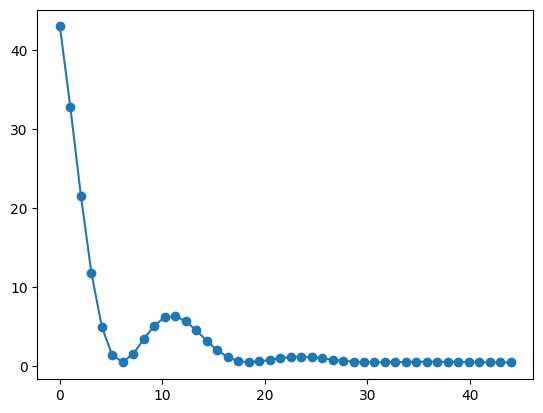

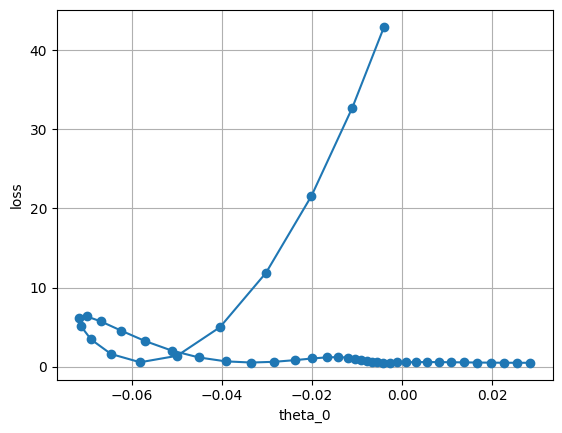

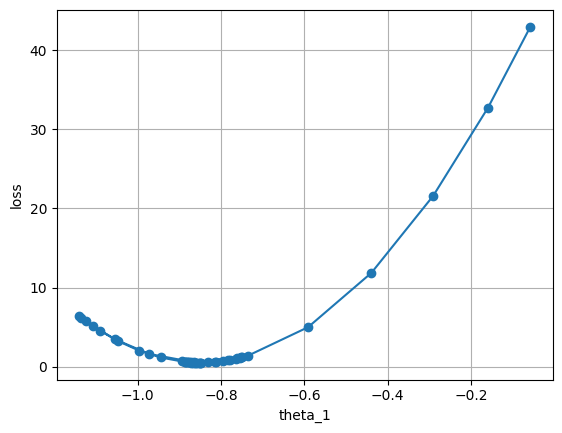

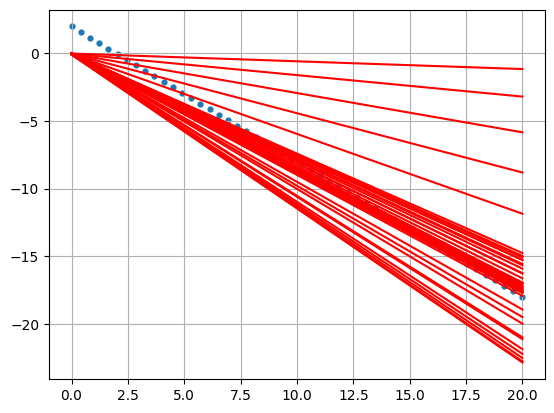

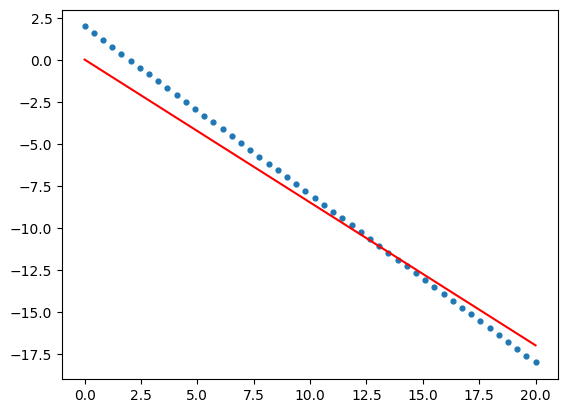

In [304]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,x,y)
plot_best_regression_line(theta_0,theta_1,x,y)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [305]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1 = GD(x,y,0.0005,300,0.89,len(x))

1
************************* iter 0 *************************
j = 42.96137982976481
[[  8.        ]
 [114.69387755]]
Gradiant_vec_norm = 114.97254258164628
theta_new :
-0.004
-0.05734693877551021
************************* iter 1 *************************
j = 32.79902223388137
[[  6.90858286]
 [100.01938542]]
Gradiant_vec_norm = 100.25769784628373
theta_new :
-0.011014291428571429
-0.15839540699708454
************************* iter 2 *************************
j = 21.73345805931284
[[ 5.49945755]
 [81.07297298]]
Gradiant_vec_norm = 81.25928243442424
theta_new :
-0.020006739576028575
-0.2888650302060583
************************* iter 3 *************************
j = 12.09459589509255
[[ 3.92216003]
 [59.86504745]]
Gradiant_vec_norm = 59.993393345453015
theta_new :
-0.029971098443741576
-0.43491551858532196
************************* iter 4 *************************
j = 5.248885096762489
[[ 2.31215609]
 [38.2168513 ]]
Gradiant_vec_norm = 38.286731235393376
theta_new :
-0.03999545588087381
-0.

In [306]:
r2_s(theta_0,theta_1,x,y)

-0.006091675726615668
-0.8572777153657858
[-6.09167573e-03 -3.56000947e-01 -7.05910219e-01 -1.05581949e+00
 -1.40572876e+00 -1.75563803e+00 -2.10554731e+00 -2.45545658e+00
 -2.80536585e+00 -3.15527512e+00 -3.50518439e+00 -3.85509366e+00
 -4.20500293e+00 -4.55491221e+00 -4.90482148e+00 -5.25473075e+00
 -5.60464002e+00 -5.95454929e+00 -6.30445856e+00 -6.65436784e+00
 -7.00427711e+00 -7.35418638e+00 -7.70409565e+00 -8.05400492e+00
 -8.40391419e+00 -8.75382347e+00 -9.10373274e+00 -9.45364201e+00
 -9.80355128e+00 -1.01534606e+01 -1.05033698e+01 -1.08532791e+01
 -1.12031884e+01 -1.15530976e+01 -1.19030069e+01 -1.22529162e+01
 -1.26028255e+01 -1.29527347e+01 -1.33026440e+01 -1.36525533e+01
 -1.40024625e+01 -1.43523718e+01 -1.47022811e+01 -1.50521904e+01
 -1.54020996e+01 -1.57520089e+01 -1.61019182e+01 -1.64518274e+01
 -1.68017367e+01 -1.71516460e+01]
0.9699718983158406


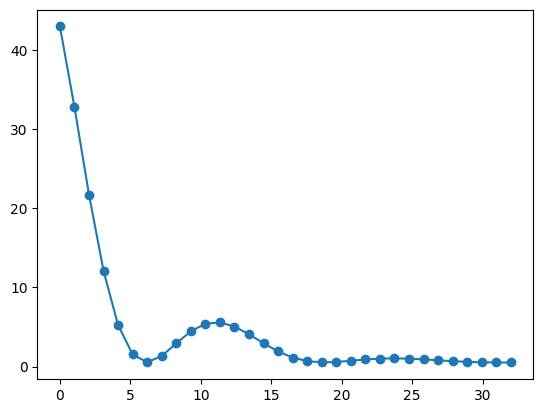

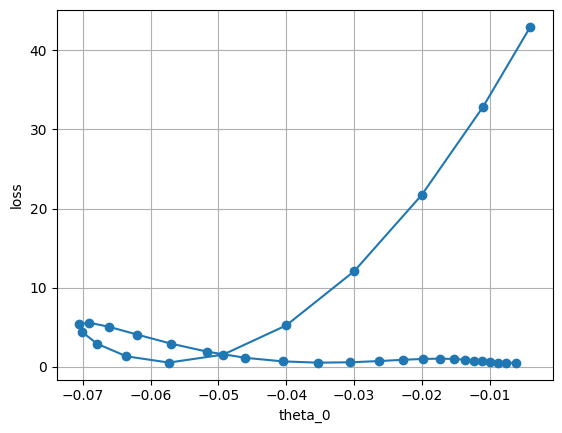

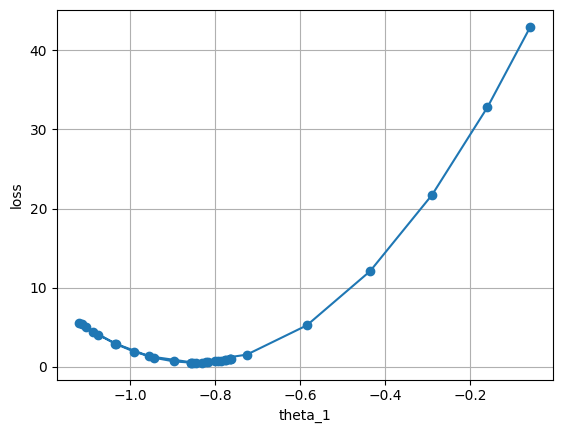

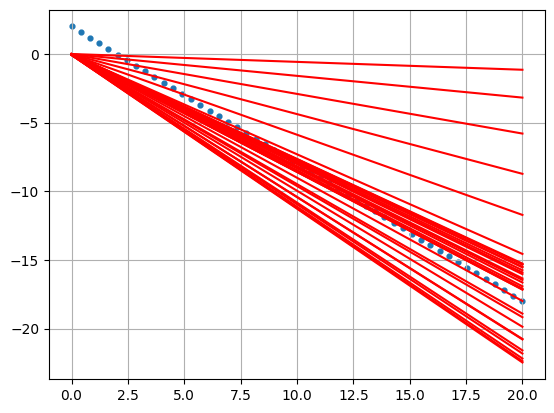

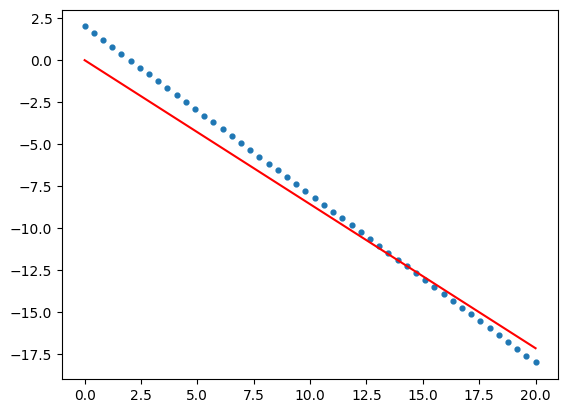

In [307]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,x,y)
plot_best_regression_line(theta_0,theta_1,x,y)